# Plotting demo - everything you can plot

This notebook shows you what you can display and how to proceed.

In short, this is what you can do for a given processed challenge:
- Plot the full task
- Plot training examples only
- Plot test examples only
- Extract a specific board easily 
- Plot a specific board
- Plot 2 specific boards side to side, no matter the boards

## Challenges initialization

In [1]:
import random
from abstract_and_reason import solver_v1
from abstract_and_reason.assets import load_json

In [2]:
base_path = '../data/challenges/'

# Reading files
training_challenges =  load_json(base_path +'arc-agi_training_challenges.json')
training_solutions =   load_json(base_path +'arc-agi_training_solutions.json')
evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path +'arc-agi_evaluation_solutions.json')
test_challenges = load_json(base_path +'arc-agi_test_challenges.json')
sample_submission = load_json(base_path + 'sample_submission.json')

In [3]:
train_ids = list(training_challenges)

In [4]:
abstract_and_reason = solver_v1.Solver()

# Demonstration

First, lets get a random challenge in the training set (could also be the eval set).

In [5]:
random_id = random.choice(train_ids)
random_id

'fcc82909'

## Plot the full task

Full task means all the training examples (input + output) and all the test examples (input + output). See bellow.

Extract a challenge with `process_challenge` then display it with `abstract_and_reason.display_task`.

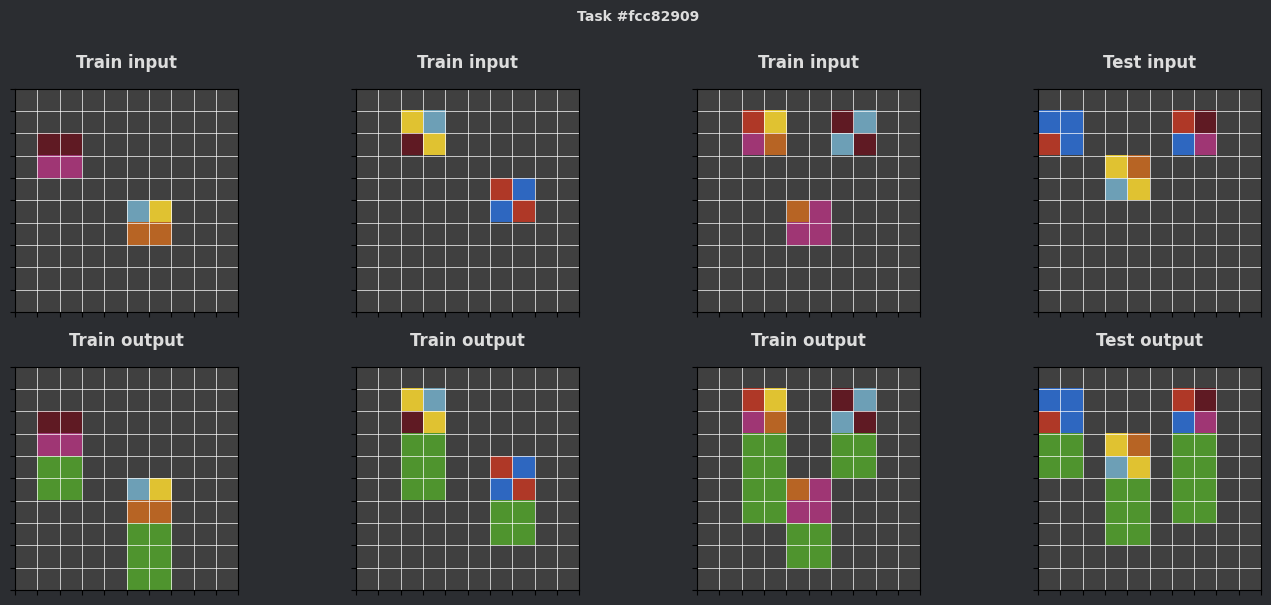

In [6]:
puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test = abstract_and_reason.process_challenge(random_id, training_challenges, training_solutions)

abstract_and_reason.display_task(random_id, puzzle_inps_train, puzzle_outs_train, puzzle_inps_test, puzzle_outs_test)

## Plot training examples only

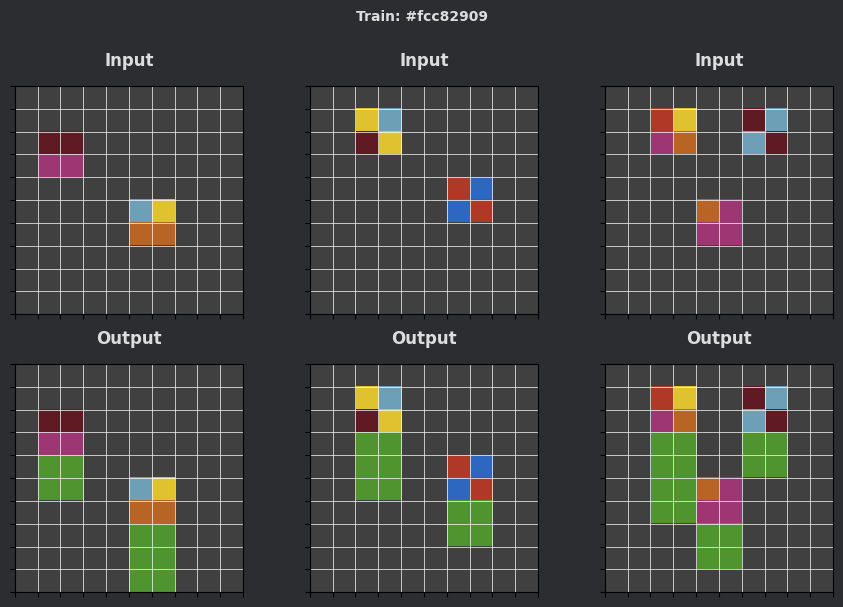

In [7]:
abstract_and_reason.display_train(random_id, puzzle_inps_train, puzzle_outs_train)

## Plot test examples only

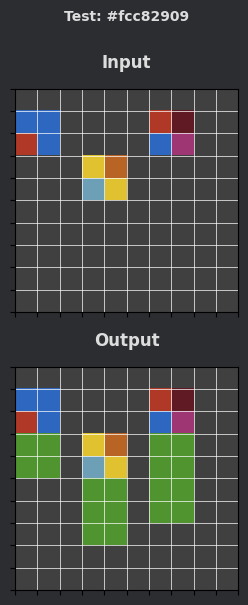

In [8]:
abstract_and_reason.display_test(random_id, puzzle_inps_test, puzzle_outs_test)

## Extract a specific board

Be careful using this `get_challenge_board()` function because parameters are case sensitive.

The challenge ID must match with the dataset you are requesting for.
Bellow example request for a challenge ID which is included in the training set. Requesting a challenge from the eval set givint the training samples will fail, and vice versa.


- `io` refers either to the input (top part) or the output (botton part) of the challenge.
- `board_type` refers to the train examples part (yellow in bellow example) or the test examples part (red in bellow picture)
- `board_idx` refers to the index of the board inside the challenge. If the training part of a given challenge has 4 board, then `board_idx`is between 0 and 4-1=3.

![test](../data/docs/legend_0.png)

In [9]:
io = 'output' # or 'input'
board_type = 'train' # or 'test'
board_idx = 0

board = abstract_and_reason.get_challenge_board(random_id, training_challenges, training_solutions, io, board_type, board_idx)

## Plot a specific board

Array representation: 

 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 9 9 0 0 0 0 0 0 0]
 [0 6 6 0 0 0 0 0 0 0]
 [0 3 3 0 0 0 0 0 0 0]
 [0 3 3 0 0 8 4 0 0 0]
 [0 0 0 0 0 7 7 0 0 0]
 [0 0 0 0 0 3 3 0 0 0]
 [0 0 0 0 0 3 3 0 0 0]
 [0 0 0 0 0 3 3 0 0 0]] 



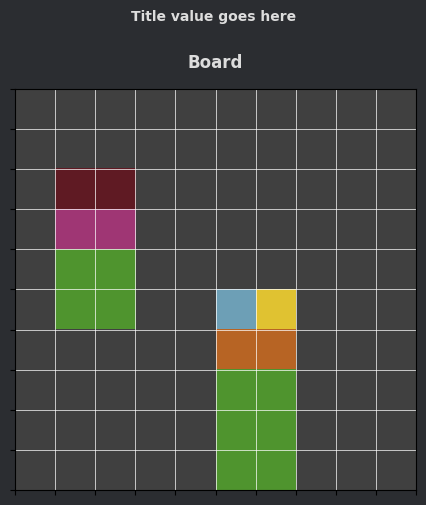

In [10]:
board = puzzle_outs_train[0]

print("Array representation: \n\n", board, "\n")

abstract_and_reason.graphics.plot_board("Title value goes here", board)

## Plot 2 boards side to side

You can plot 2 boards side 2 side, no matter the boards.

You can also share the cmap you want for each board. This can be really usefull.

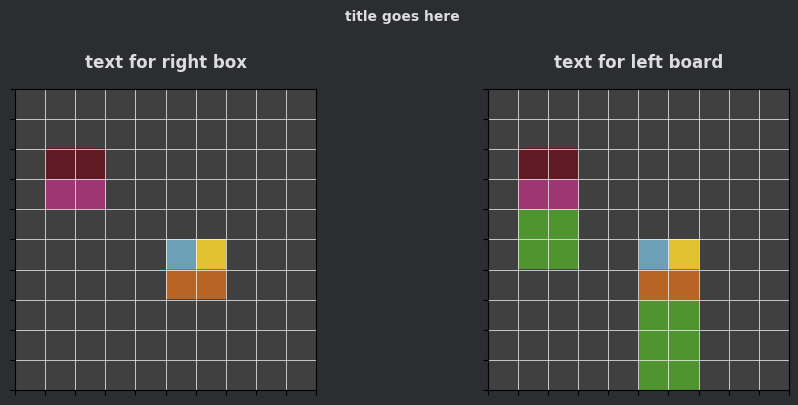

In [11]:
right_board = puzzle_inps_train[0]
left_board = puzzle_outs_train[0]

abstract_and_reason.display_side_to_side_boards(right_board, left_board, "title goes here", "text for right box", "text for left board", b1_cmap=None, b2_cmap=None)